In [162]:
import pandas as pd
from matplotlib import pyplot as plt

### Utility Functions

In [163]:
def format_time_df(df):
    time_column = list(df['unix_time'])
    start_time = time_column[0]
    time_column = [(t - start_time) / 3600.0 for t in time_column]

    df.insert(0, 'monitor_time_hrs', time_column)
    return df

In [164]:
# Actuators of interest for each sensor
sensors_to_actuators = {
    'light': ['led'],
    'temp': ['led', 'fan'],
    'humid': ['fan', 'wpump'],
    'weight': ['wpump'],
    'smoist': ['fan', 'wpump'],
    'level': ['wpump']
}

In [165]:
# Axis labels for sensors
sensors_to_labels = {
    'light': 'Light Level',
    'temp': 'Temperature (degrees Celsius)',
    'humid': 'Humidity (%)',
    'weight': 'Greenhouse Weight (g)',
    'smoist': 'Soil Moisture',
    'level': 'Reservoir Level (mL)'
}

In [166]:
# Plot colors for actuators
actuators_to_colors = {
    'led': 'red',
    'fan': 'green',
    'wpump': 'blue'
}

In [167]:
# Get times when actuators were activated/deactivated
def get_actuator_activations(
    times: list[float],
    values: list) -> tuple[list[float], list[float]]:
    on = []
    off = []
    prev = None
    curr = None
    for (t, v) in zip(times, values):
        curr = v
        if prev is None:
            if curr:
                on.append(t)
            else:
                off.append(t)
        else:
            if isinstance(curr, bool):
                if prev != curr:
                    if curr:
                        on.append(t)
                    else:
                        off.append(t)
            elif isinstance(curr, int) or isinstance(curr, float):
                if (prev == 0 and curr != 0) or (prev != 0 and curr == 0):
                    if curr:
                        on.append(t)
                    else:
                        off.append(t)
        prev = curr
    return on, off

## Visualizing Simulated Data

In [140]:
sim_log_file_name = "part4/logs/simulated_data.csv"
sim_df = pd.read_csv(sim_log_file_name)
sim_df

,unix_time,light,temp,humid,weight,smoist,level,level_raw,light_raw_1,light_raw_2,...,humid_raw_1,humid_raw_2,weight_raw_1,weight_raw_2,smoist_raw_1,smoist_raw_2,fan,wpump,led,camera
0,946685050.0,0.0,22.0,56.0,774.961212,549.0,135.000000,135.000000,0,0,...,56,56,348.732544,426.228668,549,549,False,False,0,NaN
1,946685075.0,0.0,22.0,56.0,774.957214,549.0,135.000000,135.000000,0,0,...,56,56,348.730743,426.226471,549,549,False,False,0,NaN
2,946685100.0,0.0,22.0,57.0,774.953278,549.0,135.000000,135.000000,0,0,...,57,57,348.728973,426.224304,549,549,False,False,0,NaN
3,946685125.0,0.0,22.0,57.0,774.949341,549.0,135.000000,135.000000,0,0,...,57,57,348.727203,426.222137,549,549,False,False,0,NaN
4,946685150.0,0.0,22.0,58.0,774.945557,549.0,135.000000,135.000000,0,0,...,58,58,348.725494,426.220062,549,549,False,False,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,946774515.0,0.0,24.0,90.0,837.626495,671.0,131.850006,131.850006,0,0,...,90,90,376.931915,460.694580,671,671,False,False,0,NaN
3581,946774540.0,0.0,24.0,91.0,837.625519,671.0,131.850006,131.850006,0,0,...,91,91,376.931488,460.694031,671,671,False,False,0,NaN
3582,946774565.0,0.0,24.0,91.0,837.624512,671.0,131.850006,131.850006,0,0,...,91,91,376.931030,460.693481,671,671,False,False,0,NaN
3583,946774590.0,0.0,24.0,91.0,837.623566,671.0,131.850006,131.850006,0,0,...,91,91,376.930603,460.692963,671,671,False,False,0,NaN


In [141]:
sim_df = format_time_df(sim_df)
sim_df

,monitor_time_hrs,unix_time,light,temp,humid,weight,smoist,level,level_raw,light_raw_1,...,humid_raw_1,humid_raw_2,weight_raw_1,weight_raw_2,smoist_raw_1,smoist_raw_2,fan,wpump,led,camera
0,0.000000,946685050.0,0.0,22.0,56.0,774.961212,549.0,135.000000,135.000000,0,...,56,56,348.732544,426.228668,549,549,False,False,0,NaN
1,0.006944,946685075.0,0.0,22.0,56.0,774.957214,549.0,135.000000,135.000000,0,...,56,56,348.730743,426.226471,549,549,False,False,0,NaN
2,0.013889,946685100.0,0.0,22.0,57.0,774.953278,549.0,135.000000,135.000000,0,...,57,57,348.728973,426.224304,549,549,False,False,0,NaN
3,0.020833,946685125.0,0.0,22.0,57.0,774.949341,549.0,135.000000,135.000000,0,...,57,57,348.727203,426.222137,549,549,False,False,0,NaN
4,0.027778,946685150.0,0.0,22.0,58.0,774.945557,549.0,135.000000,135.000000,0,...,58,58,348.725494,426.220062,549,549,False,False,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,24.851389,946774515.0,0.0,24.0,90.0,837.626495,671.0,131.850006,131.850006,0,...,90,90,376.931915,460.694580,671,671,False,False,0,NaN
3581,24.858333,946774540.0,0.0,24.0,91.0,837.625519,671.0,131.850006,131.850006,0,...,91,91,376.931488,460.694031,671,671,False,False,0,NaN
3582,24.865278,946774565.0,0.0,24.0,91.0,837.624512,671.0,131.850006,131.850006,0,...,91,91,376.931030,460.693481,671,671,False,False,0,NaN
3583,24.872222,946774590.0,0.0,24.0,91.0,837.623566,671.0,131.850006,131.850006,0,...,91,91,376.930603,460.692963,671,671,False,False,0,NaN


In [143]:
def plot_sim_sensor(df, sensor: str, actuators=None):
    X = df['monitor_time_hrs']
    Y = df[sensor]
    if actuators is None:
        actuators = sensors_to_actuators[sensor]  # Default

    plt.plot(X, Y, 'k', linewidth=1)

    for actuator in actuators:
        on_times, off_times = get_actuator_activations(X, df[actuator])
        color = actuators_to_colors[actuator]
        first = True
        for t in on_times:
            if first:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5,
                        label=f'{actuator} turned on')
            else:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5)
            first = False
        first = True
        for t in off_times:
            if first:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5,
                        label=f'{actuator} turned off')
            else:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5)
            first = False

    plt.xlabel('Hours Passed')
    plt.ylabel(sensors_to_labels[sensor])
    plt.title(f'Plot of {sensor} over time (Real)')
    plt.legend()
    plt.show()



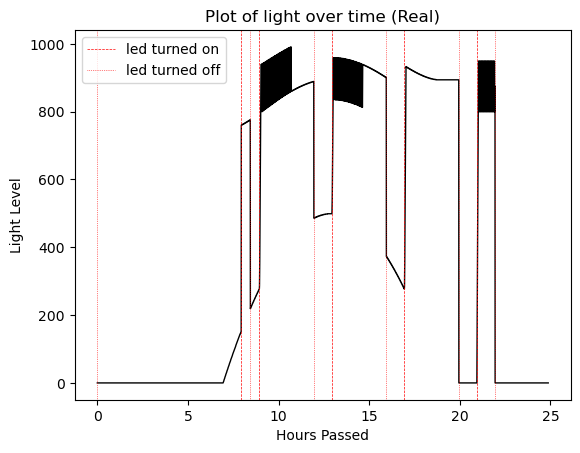

In [144]:
plot_sim_sensor(sim_df, 'light')

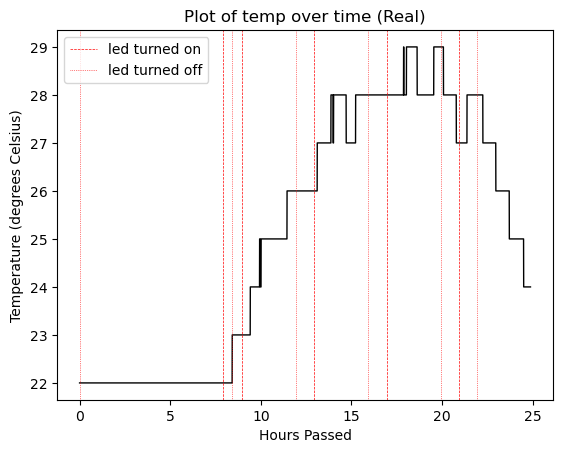

In [145]:
plot_sim_sensor(sim_df, 'temp', actuators=['led'])

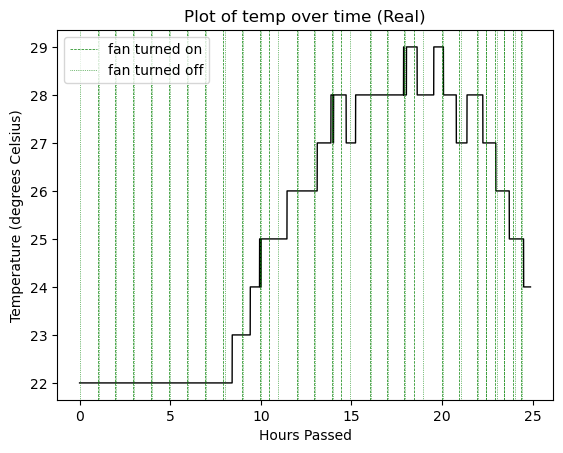

In [146]:
plot_sim_sensor(sim_df, 'temp', actuators=['fan'])

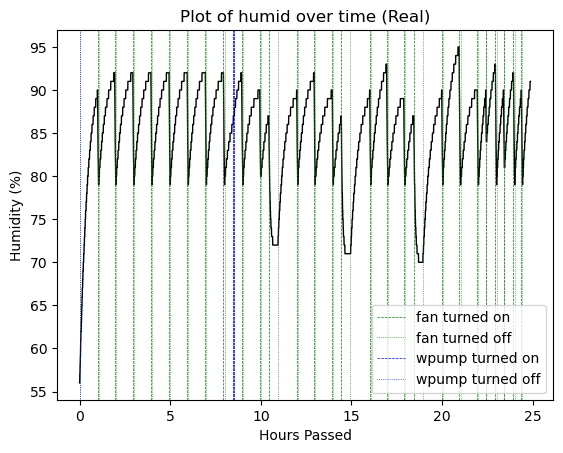

In [147]:
plot_sim_sensor(sim_df, 'humid')

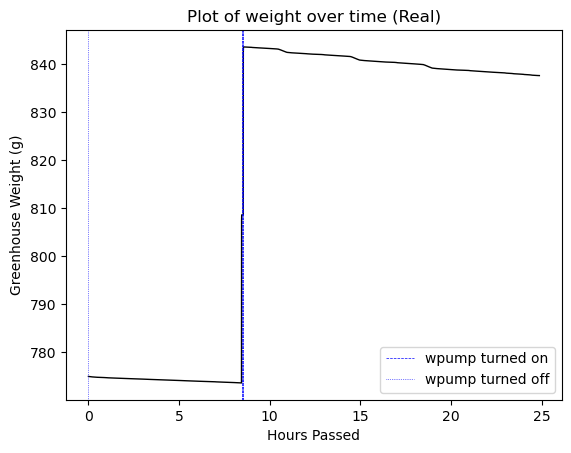

In [148]:
plot_sim_sensor(sim_df, 'weight')

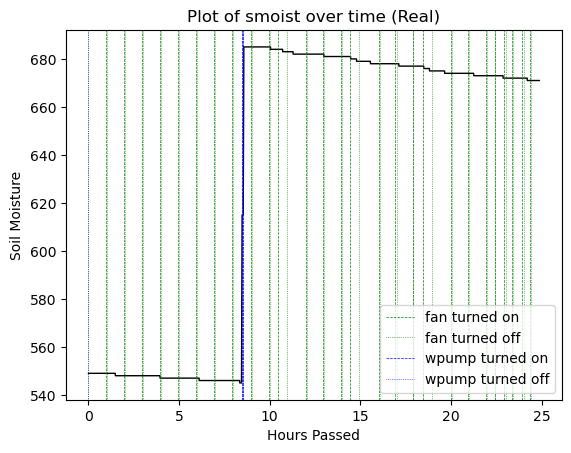

In [149]:
plot_sim_sensor(sim_df, 'smoist')

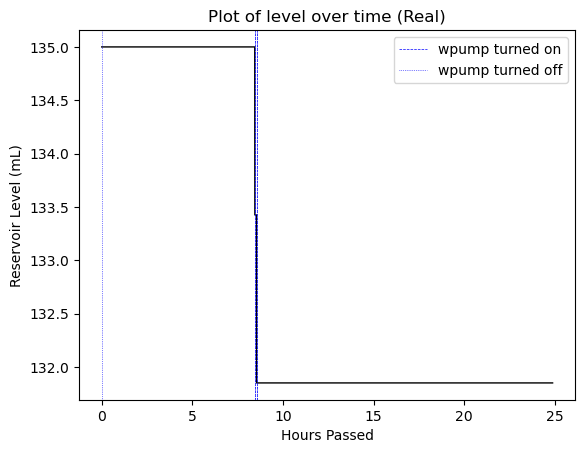

In [150]:
plot_sim_sensor(sim_df, 'level')

## Visualizing Real Data

### Functions to Format Data

In [168]:
def format_raw_line(line: str) -> str:
    line = line.strip()
    
    # Sensors
    line = line.replace("'Soil Moisture'", "smoist")
    line = line.replace("'Light Level'", "light")
    line = line.replace("'Humidity'", "humid")
    line = line.replace("'Water Level'", "level")
    line = line.replace("'Temperature'", "temp")
    line = line.replace("'Weight'", "weight")

    # Actuators
    line = line.replace("'LEDs'", "led")
    line = line.replace("'Fan'", "fan")
    line = line.replace("'Pump'", "wpump")

    # Format for CSV
    line_list = line.split(sep=' ')
    if len(line_list) == 4:
        line_list = line_list[:2] + [str(float(line_list[2]) + float(line_list[3]) / 2)]
    return ",".join(line_list) + ",\n"

In [169]:
# Formatting Function
def format_raw_data(raw_fname: str, formatted_fname: str):
    new_content = ["unix_time,feature,value,\n"]
    with open(raw_fname, "r") as file:
        for line in file:
            new_content += format_raw_line(line)
    
    with open(formatted_fname, "w") as file:
        for new_line in new_content:
            file.write(new_line)

In [171]:
# Take raw recorded data from remote server and format it into CSV file
raw_data_fname = "part4/logs/real/session2_raw.txt"
formatted_data_fname = "part4/logs/real/session2_formatted.csv"
format_raw_data(raw_data_fname, formatted_data_fname)

### Plotting

In [205]:
real_log_file_name = "part4/logs/real/session1_formatted.csv"
real_df = pd.read_csv(real_log_file_name, dtype={'unix_time': float, 'feature': str, 'value': float})
real_df

,unix_time,feature,value,Unnamed: 3
0,1.758740e+09,smoist,872.0,NaN
1,1.758740e+09,light,18.5,NaN
2,1.758740e+09,level,87.0,NaN
3,1.758740e+09,temp,37.5,NaN
4,1.758740e+09,humid,77.0,NaN
...,...,...,...,...
544852,1.758820e+09,smoist,882.0,NaN
544853,1.758820e+09,smoist,882.0,NaN
544854,1.758820e+09,weight,328.8,NaN
544855,1.758820e+09,weight,328.8,NaN


In [206]:
real_df = format_time_df(real_df)
real_df

,monitor_time_hrs,unix_time,feature,value,Unnamed: 3
0,0.000000e+00,1.758740e+09,smoist,872.0,NaN
1,2.863672e-07,1.758740e+09,light,18.5,NaN
2,4.288885e-07,1.758740e+09,level,87.0,NaN
3,6.241931e-07,1.758740e+09,temp,37.5,NaN
4,8.072456e-07,1.758740e+09,humid,77.0,NaN
...,...,...,...,...,...
544852,2.222071e+01,1.758820e+09,smoist,882.0,NaN
544853,2.222071e+01,1.758820e+09,smoist,882.0,NaN
544854,2.222073e+01,1.758820e+09,weight,328.8,NaN
544855,2.222073e+01,1.758820e+09,weight,328.8,NaN


In [198]:
def plot_real_sensor(df, sensor: str, actuators=None):
    X = df[df['feature'] == sensor]['monitor_time_hrs']
    Y = df[df['feature'] == sensor]['value']
    if actuators is None:
        actuators = sensors_to_actuators[sensor]  # Default

    plt.plot(X, Y, 'k-', linewidth=1, label=sensor)

    for actuator in actuators:
        T = df[df['feature'] == actuator]['monitor_time_hrs']
        Z = df[df['feature'] == actuator]['value']
        on_times, off_times = get_actuator_activations(T, Z)
        color = actuators_to_colors[actuator]
        first = True
        for t in on_times:
            if first:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5,
                        label=f'{actuator} turned on')
            else:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5)
            first = False
        first = True
        for t in off_times:
            if first:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5,
                        label=f'{actuator} turned off')
            else:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5)
            first = False

    plt.xlabel('Hours Passed')
    plt.ylabel(sensors_to_labels[sensor])
    plt.title(f'Plot of {sensor} over time (Real)')
    plt.legend()
    plt.show()


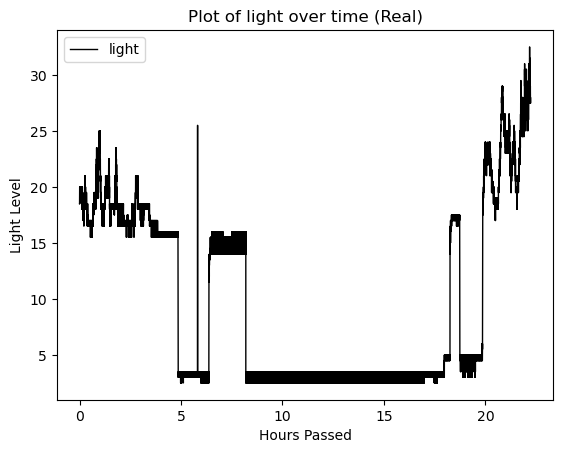

In [207]:
plot_real_sensor(real_df, 'light')

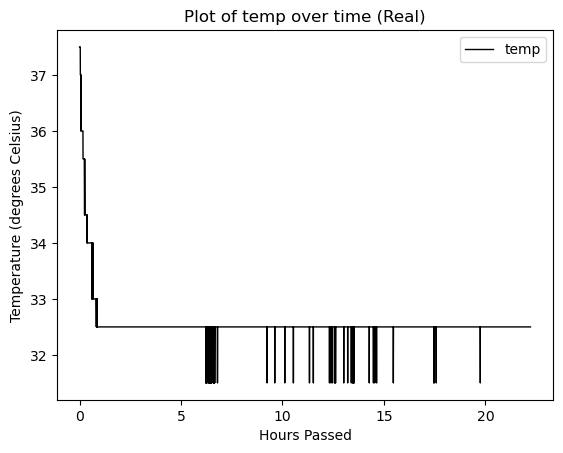

In [208]:
plot_real_sensor(real_df, 'temp', actuators=['led', 'fan'])

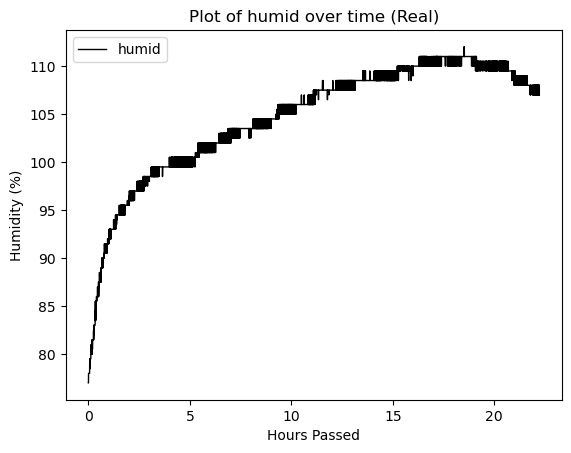

In [209]:
plot_real_sensor(real_df, 'humid')

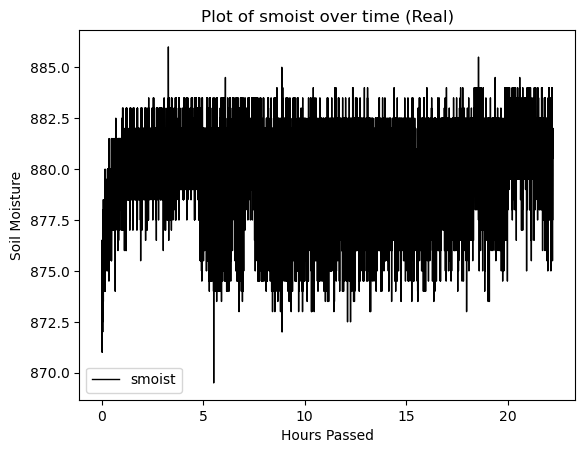

In [210]:
plot_real_sensor(real_df, 'smoist')

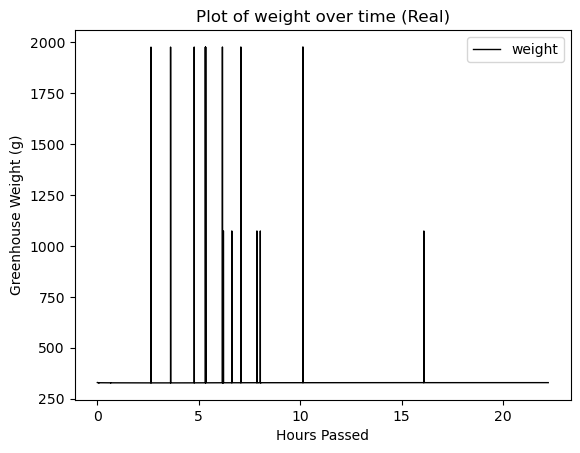

In [211]:
plot_real_sensor(real_df, 'weight')

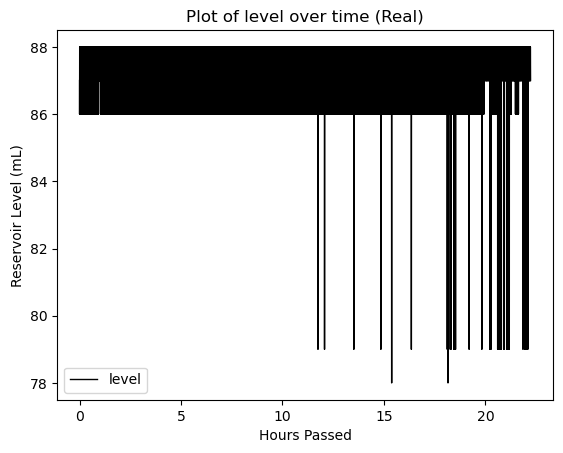

In [212]:
plot_real_sensor(real_df, 'level')